# 공정 4개 전처리

In [103]:
import numpy as np
import pandas as pd

In [104]:
THRESHOLD = 0.3
RANDOM_STATE = 110

# csv 불러오기
train_data = pd.read_csv('../../data/trim_train_data.csv')
test_data = pd.read_csv('../../data/trim_test_data.csv')

In [105]:
# train_data와 test_data에서 '?'를 포함하는 열 이름 필터링
train_Process_Desc_col = train_data.filter(like='?').columns
test_Process_Desc_col = test_data.filter(like='?').columns

# 필터링된 열 이름 출력
print("<? column in train_data>")
for col in train_Process_Desc_col:
    print(col)

print("<? column in test_data>")
for col in test_Process_Desc_col:
    print(col)

# ? -> Θ로 변경할 열 이름과 새 열 이름 생성
train_new_columns = {col: col.replace('?', 'Θ') for col in train_Process_Desc_col}
test_new_columns = {col: col.replace('?', 'Θ') for col in test_Process_Desc_col}

# 열 이름 변경
train_data.rename(columns=train_new_columns, inplace=True)
test_data.rename(columns=test_new_columns, inplace=True)

# 'Θ'를 포함하는 열 이름 필터링
train_Process_Desc_col = train_data.filter(like='Θ').columns
test_Process_Desc_col = test_data.filter(like='Θ').columns

# 필터링된 열 이름 출력
print("<? -> Θ in train_data>")
for col in train_Process_Desc_col:
    print(col)

print("<? -> Θ in test_data>")
for col in test_Process_Desc_col:
    print(col)

<? column in train_data>
CURE END POSITION ? Collect Result_Dam
CURE END POSITION ? Unit Time_Dam
CURE END POSITION ? Judge Value_Dam
CURE STANDBY POSITION ? Collect Result_Dam
CURE STANDBY POSITION ? Unit Time_Dam
CURE STANDBY POSITION ? Judge Value_Dam
CURE START POSITION ? Collect Result_Dam
CURE START POSITION ? Unit Time_Dam
CURE START POSITION ? Judge Value_Dam
CURE END POSITION ? Collect Result_Fill2
CURE END POSITION ? Unit Time_Fill2
CURE END POSITION ? Judge Value_Fill2
CURE STANDBY POSITION ? Collect Result_Fill2
CURE STANDBY POSITION ? Unit Time_Fill2
CURE STANDBY POSITION ? Judge Value_Fill2
CURE START POSITION ? Collect Result_Fill2
CURE START POSITION ? Unit Time_Fill2
CURE START POSITION ? Judge Value_Fill2
<? column in test_data>
<? -> Θ in train_data>
CURE END POSITION Θ Collect Result_Dam
CURE END POSITION Θ Unit Time_Dam
CURE END POSITION Θ Judge Value_Dam
CURE STANDBY POSITION Θ Collect Result_Dam
CURE STANDBY POSITION Θ Unit Time_Dam
CURE STANDBY POSITION Θ Judge 

In [106]:
# # csv 불러오기
# train_data = pd.read_csv('../../data/train_data.csv')
# test_data = pd.read_csv('../../data/test_data.csv')

In [107]:
# train_data.info(verbose=True)

### 1. 기본 전처리

In [108]:
# target 열을 임시로 분리
target_train = train_data['target']
target_test = test_data['target']

# 모든 값이 NaN인 열 제거
train_data = train_data.dropna(axis=1, how='all')
test_data = test_data.dropna(axis=1, how='all')

# target 열을 다시 결합
train_data['target'] = target_train
test_data['target'] = target_test

In [109]:
# Wip Line 열 제거
wip_line_columns = train_data.filter(like='Wip Line').columns

train_data.drop(columns=wip_line_columns, inplace=True)
test_data.drop(columns=wip_line_columns, inplace=True)

In [110]:
# Process Desc 열 제거
Process_Desc_col = train_data.filter(like='Process Desc').columns

train_data.drop(columns=Process_Desc_col, inplace=True)
test_data.drop(columns=Process_Desc_col, inplace=True)

In [111]:
# Insp. Seq No 열 제거
Insp_Seq_No_col = train_data.filter(like='Insp. Seq No').columns

train_data.drop(columns=Insp_Seq_No_col, inplace=True)
test_data.drop(columns=Insp_Seq_No_col, inplace=True)

In [112]:
# Insp Judge Code 열 제거
Insp_Judge_Code_col = train_data.filter(like='Insp Judge Code').columns

train_data.drop(columns=Insp_Judge_Code_col, inplace=True)
test_data.drop(columns=Insp_Judge_Code_col, inplace=True)

### 2. 제품 구분

- receip no, workorder, model.suffix

In [113]:
### Receip_No
# 파생변수 생성: Receip_No 3개의 컬럼 값이 모두 동일하면 해당 값을 저장, 아니면 diff
train_data['Receip_No'] = train_data.apply(
    lambda row: row['Receip No Collect Result_Dam'] if (row['Receip No Collect Result_Dam'] == row['Receip No Collect Result_Fill1'] == row['Receip No Collect Result_Fill2']) else 'diff',
    axis=1
)
test_data['Receip_No'] = test_data.apply(
    lambda row: row['Receip No Collect Result_Dam'] if (row['Receip No Collect Result_Dam'] == row['Receip No Collect Result_Fill1'] == row['Receip No Collect Result_Fill2']) else 'diff',
    axis=1
)

# 필요없는 변수 삭제
train_data = train_data.drop(columns=['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2'])
test_data = test_data.drop(columns=['Receip No Collect Result_Dam', 'Receip No Collect Result_Fill1', 'Receip No Collect Result_Fill2'])

In [114]:
### model_receip
test_data['Receip_No'] = test_data['Receip_No'].astype(int).astype(str)

# 파생변수 생성: Receip No와 Model.Suffix의 조합
train_data['model_receip'] = train_data['Model.Suffix_Dam'] + '_' + train_data['Receip_No'].astype(str)
test_data['model_receip'] = test_data['Model.Suffix_Dam'] + '_' + test_data['Receip_No'].astype(str)

# 필요없는 변수 삭제
train_data = train_data.drop(columns=['Model.Suffix_Dam', 'Model.Suffix_AutoClave', 'Model.Suffix_Fill1', 'Model.Suffix_Fill2'])
test_data = test_data.drop(columns=['Model.Suffix_Dam', 'Model.Suffix_AutoClave', 'Model.Suffix_Fill1', 'Model.Suffix_Fill2'])

In [115]:
### workorder_receip
# Workorder -뒤의 번호 구분을 제거
train_data['cleaned_workorder'] = train_data['Workorder_Dam'].str.split('-').str[0]
test_data['cleaned_workorder'] = test_data['Workorder_Dam'].str.split('-').str[0]

# 파생변수 생성: Receip No와 workorder의 조합
train_data['workorder_receip'] = train_data['cleaned_workorder'] + '_' + train_data['Receip_No'].astype(str)
test_data['workorder_receip'] = test_data['cleaned_workorder'] + '_' + test_data['Receip_No'].astype(str)

# 필요없는 변수 삭제
train_data = train_data.drop(columns=['Receip_No', 'cleaned_workorder', 'Workorder_Dam', 'Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2'])
test_data = test_data.drop(columns=['Receip_No', 'cleaned_workorder', 'Workorder_Dam', 'Workorder_AutoClave', 'Workorder_Fill1', 'Workorder_Fill2'])

### 3. 공통 변수 (dam, fill1, fill2)

- workmode

In [116]:
# WorkMode Collect Result_Dam의 이름을 WorkMode Collect Result로 변경
train_data = train_data.rename(columns={'WorkMode Collect Result_Dam': 'WorkMode Collect Result'})
test_data = test_data.rename(columns={'WorkMode Collect Result_Dam': 'WorkMode Collect Result'})

# WorkMode Collect Result_Fill1, WorkMode Collect Result_Fill2 열 드롭
train_data = train_data.drop(columns=['WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2'])
test_data = test_data.drop(columns=['WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2'])

In [117]:
# WorkMode Collect Result 열의 값이 7인 행을 1로 변경
train_data['WorkMode Collect Result'] = train_data['WorkMode Collect Result'].replace(7, 1)
test_data['WorkMode Collect Result'] = test_data['WorkMode Collect Result'].replace(7, 1)

# WorkMode Collect Result 열의 결측값을 0으로 채움
train_data['WorkMode Collect Result'] = train_data['WorkMode Collect Result'].fillna(0)
test_data['WorkMode Collect Result'] = test_data['WorkMode Collect Result'].fillna(0)

- equipment
<br>(dispenser1 & dispenser2 변수를 만들 경우 다른 변수들에 의해 이미 설명이 되는 변수라 상관계수가 너무 높아서 제거하게 됨. 따라서 equipment가 같은지만 판단하는 파생변수 사용)

In [118]:
# Equipment로 시작하는 열 필터링
Equipment_col = train_data.filter(like='Equipment').columns
Equipment_col2 = test_data.filter(like='Equipment').columns

new_train = train_data.filter(items=Equipment_col)
new_test = test_data.filter(items=Equipment_col2)

# Equipment_same_num 파생변수 생성
def determine_equipment_same_num(row):
    if (row['Equipment_Dam'] == 'Dam dispenser #1' and row['Equipment_AutoClave'] == 'Auto Clave Out' and 
        row['Equipment_Fill1'] == 'Fill1 dispenser #1' and row['Equipment_Fill2'] == 'Fill2 dispenser #1') or \
       (row['Equipment_Dam'] == 'Dam dispenser #2' and row['Equipment_AutoClave'] == 'Auto Clave Out' and 
        row['Equipment_Fill1'] == 'Fill1 dispenser #2' and row['Equipment_Fill2'] == 'Fill2 dispenser #2'):
        return 1
    else:
        return 0

train_data['Equipment_same_num'] = new_train.apply(determine_equipment_same_num, axis=1)
test_data['Equipment_same_num'] = new_test.apply(determine_equipment_same_num, axis=1)

train_data = train_data.drop(columns=['Equipment_Dam', 'Equipment_AutoClave', 'Equipment_Fill1', 'Equipment_Fill2'])
test_data = test_data.drop(columns=['Equipment_Dam', 'Equipment_AutoClave', 'Equipment_Fill1', 'Equipment_Fill2'])

- palletID

In [119]:
# 세 변수의 값이 동일하면 해당 값을 가져가고, 하나라도 일치하지 않으면 diff의 값을 가지는 파생 변수 생성 함수
def create_palletid_collect_result(df):
    df['PalletID_Collect_Result'] = df.apply(
        lambda row: row['PalletID Collect Result_Dam'] 
                    if (row['PalletID Collect Result_Dam'] == row['PalletID Collect Result_Fill1'] == row['PalletID Collect Result_Fill2']) 
                    else 'diff', 
        axis=1
    )

# 함수 적용
create_palletid_collect_result(train_data)
create_palletid_collect_result(test_data)

In [120]:
# 제거할 변수 목록
columns_to_drop = [
    'PalletID Collect Result_Dam',
    'PalletID Collect Result_Fill1',
    'PalletID Collect Result_Fill2'
]

# 변수 제거
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

- production Qty

In [121]:
# 세 변수의 값이 동일하면 해당 값을 가져가고, 하나라도 일치하지 않으면 0의 값을 가지는 파생 변수 생성 함수
def create_palletid_collect_result(df):
    df['Production_Qty_Collect_Result'] = df.apply(
        lambda row: row['Production Qty Collect Result_Dam'] 
                    if (row['Production Qty Collect Result_Dam'] == row['Production Qty Collect Result_Fill1'] == row['Production Qty Collect Result_Fill2']) 
                    else 0, 
        axis=1
    )

# 함수 적용
create_palletid_collect_result(train_data)
create_palletid_collect_result(test_data)

In [122]:
# 제거할 변수 목록
columns_to_drop = [
    'Production Qty Collect Result_Dam',
    'Production Qty Collect Result_Fill1',
    'Production Qty Collect Result_Fill2'
]

# 변수 제거
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

### 4. CURE 변수
- dam -> distance 파생변수 (standby는 단일값, start와 end는 값은 여러개지만 distance 파생변수를 만들었을 때 더 의미있었음)
- fill2 -> 변수값 범주화 (start, end, standby를 각각 범주화했을 때가 합쳐서 distance 만들었을 때보다 더 의미있었음)

In [123]:
### dam
# 시작 위치와 끝 위치 열 이름
start_x_col = 'CURE START POSITION X Collect Result_Dam'
start_z_col = 33.5
end_x_col = 'CURE END POSITION X Collect Result_Dam'
end_z_col = 'CURE END POSITION Z Collect Result_Dam'

# 시작 위치와 끝 위치 사이의 거리 계산
train_data['CURE_DISTANCE_Dam'] = np.sqrt(
    (train_data[end_x_col] - train_data[start_x_col]) ** 2 +
    (train_data[end_z_col] - start_z_col) ** 2
)

test_data['CURE_DISTANCE_Dam'] = np.sqrt(
    (train_data[end_x_col] - train_data[start_x_col]) ** 2 +
    (train_data[end_z_col] - start_z_col) ** 2
)

In [124]:
### fill2
# UV 경화 좌표 합치기
def create_coordinate_columns(data):
    # Fill2
    # cure end
    data['cure_end_position_XZ_Fill2'] = (
        data['CURE END POSITION X Collect Result_Fill2'].astype(str) + ',' +
        data['CURE END POSITION Z Collect Result_Fill2'].astype(str) 
    )

    # cure start
    data['cure_start_position_XZ_Fill2'] = (
        data['CURE START POSITION X Collect Result_Fill2'].astype(str) + ',' +
        data['CURE START POSITION Z Collect Result_Fill2'].astype(str) 
    )

    # cure standby
    data['cure_standby_position_XZ_Fill2'] = (
        data['CURE STANDBY POSITION X Collect Result_Fill2'].astype(str) + ',' +
        data['CURE STANDBY POSITION Z Collect Result_Fill2'].astype(str) 
    )

# train_data와 test_data에 대해 함수 호출
create_coordinate_columns(train_data)
create_coordinate_columns(test_data)

In [125]:
# 제거할 변수 목록
columns_to_drop = [
    'CURE END POSITION X Collect Result_Dam',
    'CURE END POSITION Z Collect Result_Dam',
    'CURE END POSITION Θ Collect Result_Dam',
    'CURE START POSITION X Collect Result_Dam',
    'CURE START POSITION Z Collect Result_Dam',
    'CURE START POSITION Θ Collect Result_Dam',

    'CURE END POSITION X Collect Result_Fill2',
    'CURE END POSITION Z Collect Result_Fill2',
    'CURE END POSITION Θ Collect Result_Fill2',
    'CURE START POSITION X Collect Result_Fill2',
    'CURE START POSITION Z Collect Result_Fill2',
    'CURE START POSITION Θ Collect Result_Fill2',
    'CURE STANDBY POSITION X Collect Result_Fill2',
    'CURE STANDBY POSITION Z Collect Result_Fill2',
    'CURE STANDBY POSITION Θ Collect Result_Fill2'
]

# 변수 제거
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

### 5. HEAD 변수

- dam

In [126]:
# 각 스테이지의 좌표 열 정의
stage1_cols = ['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
               'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
               'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam']

stage2_cols = ['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
               'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
               'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam']

stage3_cols = ['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
               'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
               'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam']

# 거리 계산 함수
def calculate_distances(data):
    data['HEAD NORMAL DISTANCE_STAGE1_STAGE2_Dam'] = np.sqrt(
        (data[stage2_cols[0]] - data[stage1_cols[0]]) ** 2 +
        (data[stage2_cols[1]] - data[stage1_cols[1]]) ** 2 +
        (data[stage2_cols[2]] - data[stage1_cols[2]]) ** 2
    )

    data['HEAD NORMAL DISTANCE_STAGE2_STAGE3_Dam'] = np.sqrt(
        (data[stage3_cols[0]] - data[stage2_cols[0]]) ** 2 +
        (data[stage3_cols[1]] - data[stage2_cols[1]]) ** 2 +
        (data[stage3_cols[2]] - data[stage2_cols[2]]) ** 2
    )

    data['HEAD NORMAL DISTANCE_STAGE1_STAGE3_Dam'] = np.sqrt(
        (data[stage3_cols[0]] - data[stage1_cols[0]]) ** 2 +
        (data[stage3_cols[1]] - data[stage1_cols[1]]) ** 2 +
        (data[stage3_cols[2]] - data[stage1_cols[2]]) ** 2
    )

    return data

# train_data에 적용
train_data = calculate_distances(train_data)

# test_data에 적용
test_data = calculate_distances(test_data)

In [127]:
# 필요한 열 이름
stage1_stage2_col = 'HEAD NORMAL DISTANCE_STAGE1_STAGE2_Dam'
stage2_stage3_col = 'HEAD NORMAL DISTANCE_STAGE2_STAGE3_Dam'
stage1_stage3_col = 'HEAD NORMAL DISTANCE_STAGE1_STAGE3_Dam'

# 삼각형의 넓이와 높이를 계산하는 함수
def calculate_triangle_features(data):
    a = data[stage1_stage2_col]
    b = data[stage2_stage3_col]
    c = data[stage1_stage3_col]

    # 헤론의 공식에 따른 삼각형의 넓이 계산
    s = (a + b + c) / 2
    area = np.sqrt(s * (s - a) * (s - b) * (s - c))

    # 높이 계산 (밑변을 c로 가정)
    height = (2 * area) / c

    # 결과를 새로운 열에 저장
    data['HEAD NORMAL DISTANCE_TRIANGLE_area_Dam'] = area
    data['HEAD NORMAL DISTANCE_TRIANGLE_height_Dam'] = height

    return data

# train_data에 적용
train_data = calculate_triangle_features(train_data)

# test_data에 적용
test_data = calculate_triangle_features(test_data)

In [128]:
# 제거할 변수 목록
columns_to_drop = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'
    , 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam'
    , 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam'
    , 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam'

    , 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam'
    , 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam'
    , 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam'

    , 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam'
    , 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam'
    , 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam'

    , 'HEAD NORMAL DISTANCE_STAGE1_STAGE2_Dam'
    , 'HEAD NORMAL DISTANCE_STAGE2_STAGE3_Dam'
]

# 변수 제거
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

In [129]:
# Dam 노즐 zero 위치 Z좌표 드롭
train_data.drop(columns='Head Zero Position Z Collect Result_Dam', inplace=True)
test_data.drop(columns='Head Zero Position Z Collect Result_Dam', inplace=True)

- fill1

In [130]:
# 각 스테이지의 좌표 열 정의
stage1_cols = ['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
               'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
               'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1']

stage2_cols = ['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
               'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
               'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1']

stage3_cols = ['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
               'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
               'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1']

# 거리 계산 함수
def calculate_distances(data):
    data['HEAD NORMAL DISTANCE_STAGE1_STAGE2_Fill1'] = np.sqrt(
        (data[stage2_cols[0]] - data[stage1_cols[0]]) ** 2 +
        (data[stage2_cols[1]] - data[stage1_cols[1]]) ** 2 +
        (data[stage2_cols[2]] - data[stage1_cols[2]]) ** 2
    )

    data['HEAD NORMAL DISTANCE_STAGE2_STAGE3_Fill1'] = np.sqrt(
        (data[stage3_cols[0]] - data[stage2_cols[0]]) ** 2 +
        (data[stage3_cols[1]] - data[stage2_cols[1]]) ** 2 +
        (data[stage3_cols[2]] - data[stage2_cols[2]]) ** 2
    )

    data['HEAD NORMAL DISTANCE_STAGE1_STAGE3_Fill1'] = np.sqrt(
        (data[stage3_cols[0]] - data[stage1_cols[0]]) ** 2 +
        (data[stage3_cols[1]] - data[stage1_cols[1]]) ** 2 +
        (data[stage3_cols[2]] - data[stage1_cols[2]]) ** 2
    )

    return data

# train_data에 적용
train_data = calculate_distances(train_data)

# test_data에 적용
test_data = calculate_distances(test_data)

In [131]:
# 필요한 열 이름
stage1_stage2_col = 'HEAD NORMAL DISTANCE_STAGE1_STAGE2_Fill1'
stage2_stage3_col = 'HEAD NORMAL DISTANCE_STAGE2_STAGE3_Fill1'
stage1_stage3_col = 'HEAD NORMAL DISTANCE_STAGE1_STAGE3_Fill1'

# 삼각형의 넓이와 높이를 계산하는 함수
def calculate_triangle_features(data):
    a = data[stage1_stage2_col]
    b = data[stage2_stage3_col]
    c = data[stage1_stage3_col]

    # 헤론의 공식에 따른 삼각형의 넓이 계산
    s = (a + b + c) / 2
    area = np.sqrt(s * (s - a) * (s - b) * (s - c))

    # 높이 계산 (밑변을 c로 가정)
    height = (2 * area) / c

    # 결과를 새로운 열에 저장
    data['HEAD NORMAL DISTANCE_TRIANGLE_area_Fill1'] = area
    data['HEAD NORMAL DISTANCE_TRIANGLE_height_Fill1'] = height

    return data

# train_data에 적용
train_data = calculate_triangle_features(train_data)

# test_data에 적용
test_data = calculate_triangle_features(test_data)

In [132]:
# 제거할 변수 목록
columns_to_drop = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'
    , 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1'
    , 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1'
    , 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1'

    , 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1'
    , 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1'
    , 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1'

    , 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1'
    , 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1'
    , 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1'

    , 'HEAD NORMAL DISTANCE_STAGE1_STAGE2_Fill1'
    , 'HEAD NORMAL DISTANCE_STAGE2_STAGE3_Fill1'
]

# 변수 제거
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

- fill2

In [133]:
# 각 스테이지의 좌표 열 정의
stage1_cols = ['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2',
               'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2',
               'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2']

stage2_cols = ['HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2',
               'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2',
               'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2']

stage3_cols = ['HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2',
               'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',
               'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2']

# 거리 계산 함수
def calculate_distances(data):
    data['HEAD NORMAL DISTANCE_STAGE1_STAGE2_Fill2'] = np.sqrt(
        (data[stage2_cols[0]] - data[stage1_cols[0]]) ** 2 +
        (data[stage2_cols[1]] - data[stage1_cols[1]]) ** 2 +
        (data[stage2_cols[2]] - data[stage1_cols[2]]) ** 2
    )

    data['HEAD NORMAL DISTANCE_STAGE2_STAGE3_Fill2'] = np.sqrt(
        (data[stage3_cols[0]] - data[stage2_cols[0]]) ** 2 +
        (data[stage3_cols[1]] - data[stage2_cols[1]]) ** 2 +
        (data[stage3_cols[2]] - data[stage2_cols[2]]) ** 2
    )

    data['HEAD NORMAL DISTANCE_STAGE1_STAGE3_Fill2'] = np.sqrt(
        (data[stage3_cols[0]] - data[stage1_cols[0]]) ** 2 +
        (data[stage3_cols[1]] - data[stage1_cols[1]]) ** 2 +
        (data[stage3_cols[2]] - data[stage1_cols[2]]) ** 2
    )

    return data

# train_data에 적용
train_data = calculate_distances(train_data)

# test_data에 적용
test_data = calculate_distances(test_data)

In [134]:
# 제거할 변수 목록
columns_to_drop = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'
    , 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2'
    , 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2'
    , 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2'

    , 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2'
    , 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2'
    , 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2'

    , 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2'
    , 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2'
    , 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2'
]

# 변수 제거
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

### 6. Resin 변수

- dam

In [135]:
# volume*time 파생변수 - Dam
train_data['volume_time_multip_stage1_Dam'] = train_data['Dispense Volume(Stage1) Collect Result_Dam'] * train_data['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam']
train_data['volume_time_multip_stage2_Dam'] = train_data['Dispense Volume(Stage2) Collect Result_Dam'] * train_data['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam']
train_data['volume_time_multip_stage3_Dam'] = train_data['Dispense Volume(Stage3) Collect Result_Dam'] * train_data['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']

train_data['volume_time_multip_avg_Dam'] = (train_data['volume_time_multip_stage1_Dam'] + 
                                            train_data['volume_time_multip_stage2_Dam'] + 
                                            train_data['volume_time_multip_stage3_Dam']) / 3

# volume*time 파생변수 - Dam
test_data['volume_time_multip_stage1_Dam'] = test_data['Dispense Volume(Stage1) Collect Result_Dam'] * test_data['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam']
test_data['volume_time_multip_stage2_Dam'] = test_data['Dispense Volume(Stage2) Collect Result_Dam'] * test_data['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam']
test_data['volume_time_multip_stage3_Dam'] = test_data['Dispense Volume(Stage3) Collect Result_Dam'] * test_data['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']

test_data['volume_time_multip_avg_Dam'] = (test_data['volume_time_multip_stage1_Dam'] + 
                                            test_data['volume_time_multip_stage2_Dam'] + 
                                            test_data['volume_time_multip_stage3_Dam']) / 3

In [136]:
# 삭제할 열 목록 추가
columns_to_drop = [
    'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
    'Dispense Volume(Stage1) Collect Result_Dam',
    'Dispense Volume(Stage2) Collect Result_Dam',
    'Dispense Volume(Stage3) Collect Result_Dam',
    'volume_time_multip_stage1_Dam',
    'volume_time_multip_stage2_Dam',
    'volume_time_multip_stage3_Dam'
]

train_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

- fill1

In [137]:
# volume*time 파생변수 - Fill1
train_data['volume_time_multip_stage1_Fill1'] = train_data['Dispense Volume(Stage1) Collect Result_Fill1'] * train_data['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1']
train_data['volume_time_multip_stage2_Fill1'] = train_data['Dispense Volume(Stage2) Collect Result_Fill1'] * train_data['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1']
train_data['volume_time_multip_stage3_Fill1'] = train_data['Dispense Volume(Stage3) Collect Result_Fill1'] * train_data['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']

train_data['volume_time_multip_avg_Fill1'] = (train_data['volume_time_multip_stage1_Fill1'] + 
                                            train_data['volume_time_multip_stage2_Fill1'] + 
                                            train_data['volume_time_multip_stage3_Fill1']) / 3

# volume*time 파생변수 - Fill1
test_data['volume_time_multip_stage1_Fill1'] = test_data['Dispense Volume(Stage1) Collect Result_Fill1'] * test_data['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1']
test_data['volume_time_multip_stage2_Fill1'] = test_data['Dispense Volume(Stage2) Collect Result_Fill1'] * test_data['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1']
test_data['volume_time_multip_stage3_Fill1'] = test_data['Dispense Volume(Stage3) Collect Result_Fill1'] * test_data['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']

test_data['volume_time_multip_avg_Fill1'] = (test_data['volume_time_multip_stage1_Fill1'] + 
                                            test_data['volume_time_multip_stage2_Fill1'] + 
                                            test_data['volume_time_multip_stage3_Fill1']) / 3

In [138]:
# 삭제할 열 목록 추가
columns_to_drop = [
    'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
    'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
    'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1',
    'Dispense Volume(Stage1) Collect Result_Fill1',
    'Dispense Volume(Stage2) Collect Result_Fill1',
    'Dispense Volume(Stage3) Collect Result_Fill1',
    'volume_time_multip_stage1_Fill1',
    'volume_time_multip_stage2_Fill1',
    'volume_time_multip_stage3_Fill1'
]

train_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

### 7. Circle, Line 변수

In [139]:
### circle
# 열 이름 변경
train_data.rename(columns={
    'Stage1 Circle1 Distance Speed Collect Result_Dam': 'Stage1_Circle_Distance_Speed_Dam',
    'Stage2 Circle1 Distance Speed Collect Result_Dam': 'Stage2_Circle_Distance_Speed_Dam',
    'Stage3 Circle1 Distance Speed Collect Result_Dam': 'Stage3_Circle_Distance_Speed_Dam'
}, inplace=True)

test_data.rename(columns={
    'Stage1 Circle1 Distance Speed Collect Result_Dam': 'Stage1_Circle_Distance_Speed_Dam',
    'Stage2 Circle1 Distance Speed Collect Result_Dam': 'Stage2_Circle_Distance_Speed_Dam',
    'Stage3 Circle1 Distance Speed Collect Result_Dam': 'Stage3_Circle_Distance_Speed_Dam'
}, inplace=True)

In [140]:
# 제거할 변수 목록
columns_to_drop = [
    'Stage1 Circle2 Distance Speed Collect Result_Dam',
    'Stage1 Circle3 Distance Speed Collect Result_Dam',
    'Stage1 Circle4 Distance Speed Collect Result_Dam',
    
    'Stage2 Circle2 Distance Speed Collect Result_Dam',
    'Stage2 Circle3 Distance Speed Collect Result_Dam',
    'Stage2 Circle4 Distance Speed Collect Result_Dam',
    
    'Stage3 Circle2 Distance Speed Collect Result_Dam',
    'Stage3 Circle3 Distance Speed Collect Result_Dam',
    'Stage3 Circle4 Distance Speed Collect Result_Dam'
]

# 변수 제거
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

In [141]:
### line
# line1&3과 line2&4를 합친 파생변수 생성 함수
def check_distance_speed(data, stage):
    # 단계에 따라 라인 번호 정의
    line_pairs = [(1, 3), (2, 4)]
    
    # 각 라인 쌍에 대해 반복
    for line1, line2 in line_pairs:
        line1_name = f'Stage{stage} Line{line1} Distance Speed Collect Result_Dam'
        line2_name = f'Stage{stage} Line{line2} Distance Speed Collect Result_Dam'
        
        # 새로운 열 이름 설정
        new_col_name = f'stage{stage}_line{line1}{line2}_distance_speed_Dam'
        
        # 조건에 따라 값 설정
        data[new_col_name] = data.apply(
            lambda row: row[line1_name] if row[line1_name] == row[line2_name] else 'diff', axis=1
        )

# train_data와 test_data 모두에 대해 함수 호출
for stage in range(1, 4):
    check_distance_speed(train_data, stage)
    check_distance_speed(test_data, stage)

In [142]:
# train_data에서 변수들을 object 타입으로 변환
train_data['stage1_line24_distance_speed_Dam'] = train_data['stage1_line24_distance_speed_Dam'].astype(object)
train_data['stage2_line24_distance_speed_Dam'] = train_data['stage2_line24_distance_speed_Dam'].astype(object)
train_data['stage3_line24_distance_speed_Dam'] = train_data['stage3_line24_distance_speed_Dam'].astype(object)

# test_data에서 변수들을 object 타입으로 변환
test_data['stage1_line24_distance_speed_Dam'] = test_data['stage1_line24_distance_speed_Dam'].astype(object)
test_data['stage2_line24_distance_speed_Dam'] = test_data['stage2_line24_distance_speed_Dam'].astype(object)
test_data['stage3_line24_distance_speed_Dam'] = test_data['stage3_line24_distance_speed_Dam'].astype(object)

In [143]:
# 제거할 변수 목록
columns_to_drop = [
    'Stage1 Line1 Distance Speed Collect Result_Dam',
    'Stage1 Line2 Distance Speed Collect Result_Dam',
    'Stage1 Line3 Distance Speed Collect Result_Dam',
    'Stage1 Line4 Distance Speed Collect Result_Dam',
    
    'Stage2 Line1 Distance Speed Collect Result_Dam',
    'Stage2 Line2 Distance Speed Collect Result_Dam',
    'Stage2 Line3 Distance Speed Collect Result_Dam',
    'Stage2 Line4 Distance Speed Collect Result_Dam',
    
    'Stage3 Line1 Distance Speed Collect Result_Dam',
    'Stage3 Line2 Distance Speed Collect Result_Dam',
    'Stage3 Line3 Distance Speed Collect Result_Dam',
    'Stage3 Line4 Distance Speed Collect Result_Dam'
]

# 변수 제거
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

### 8. Thickness 변수

In [144]:
# 세 개 컬럼의 평균을 계산하여 새로운 컬럼 생성
train_data['average_thickness_Dam'] = train_data[['THICKNESS 1 Collect Result_Dam', 
                                                  'THICKNESS 2 Collect Result_Dam', 
                                                  'THICKNESS 3 Collect Result_Dam']].mean(axis=1)

test_data['average_thickness_Dam'] = test_data[['THICKNESS 1 Collect Result_Dam', 
                                                'THICKNESS 2 Collect Result_Dam', 
                                                'THICKNESS 3 Collect Result_Dam']].mean(axis=1)

In [145]:
# 삭제할 컬럼 리스트
columns_to_drop = [
    'THICKNESS 1 Collect Result_Dam',
    'THICKNESS 2 Collect Result_Dam',
    'THICKNESS 3 Collect Result_Dam'
]

# 지정한 컬럼 삭제
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

### 9. Autoclave 관련 변수

In [146]:
# 각 압력과 시간의 곱을 담은 새로운 컬럼 생성
train_data['1st_pressure_time_AutoClave'] = train_data['1st Pressure Collect Result_AutoClave'] * train_data['1st Pressure 1st Pressure Unit Time_AutoClave']
train_data['2nd_pressure_time_AutoClave'] = train_data['2nd Pressure Collect Result_AutoClave'] * train_data['2nd Pressure Unit Time_AutoClave']
train_data['3rd_pressure_time_AutoClave'] = train_data['3rd Pressure Collect Result_AutoClave'] * train_data['3rd Pressure Unit Time_AutoClave']

train_data['avg_pressure_time_AutoClave'] = (train_data['1st_pressure_time_AutoClave'] +
                                             train_data['2nd_pressure_time_AutoClave'] +
                                             train_data['3rd_pressure_time_AutoClave']) / 3

In [147]:
# 각 압력과 시간의 곱을 담은 새로운 컬럼 생성
test_data['1st_pressure_time_AutoClave'] = test_data['1st Pressure Collect Result_AutoClave'] * test_data['1st Pressure 1st Pressure Unit Time_AutoClave']
test_data['2nd_pressure_time_AutoClave'] = test_data['2nd Pressure Collect Result_AutoClave'] * test_data['2nd Pressure Unit Time_AutoClave']
test_data['3rd_pressure_time_AutoClave'] = test_data['3rd Pressure Collect Result_AutoClave'] * test_data['3rd Pressure Unit Time_AutoClave']

test_data['avg_pressure_time_AutoClave'] = (test_data['1st_pressure_time_AutoClave'] +
                                             test_data['2nd_pressure_time_AutoClave'] +
                                             test_data['3rd_pressure_time_AutoClave']) / 3

In [148]:
# 삭제할 컬럼 리스트
columns_to_drop = [
    '1st Pressure Collect Result_AutoClave',
    '1st Pressure 1st Pressure Unit Time_AutoClave',
    '2nd Pressure Collect Result_AutoClave',
    '2nd Pressure Unit Time_AutoClave',
    '3rd Pressure Collect Result_AutoClave',
    '3rd Pressure Unit Time_AutoClave',
]

# 지정한 컬럼 삭제
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

### 10. Time 변수

In [149]:
# 총시간 대비 비율 변수
def calculate_total_time_and_ratios(data):
    data['total_time'] = (
        data['Machine Tact time Collect Result_Dam'] +
        data['Machine Tact time Collect Result_Fill1'] +
        data['Machine Tact time Collect Result_Fill2'] +
        data['Chamber Temp. Unit Time_AutoClave']
    )
    data['time_ratio_Dam'] = (data['Machine Tact time Collect Result_Dam'] / data['total_time']).round(3)
    data['time_ratio_Fill1'] = (data['Machine Tact time Collect Result_Fill1'] / data['total_time']).round(3)
    data['time_ratio_Fill2'] = (data['Machine Tact time Collect Result_Fill2'] / data['total_time']).round(3)
    data['time_ratio_AutoClave'] = (data['Chamber Temp. Unit Time_AutoClave'] / data['total_time']).round(3)
    return data

# train_data와 test_data에 함수 적용
train_data = calculate_total_time_and_ratios(train_data)
test_data = calculate_total_time_and_ratios(test_data)

In [150]:
# 변수 제거
train_data.drop(columns=[
    'total_time'
    , 'Machine Tact time Collect Result_Dam'
    , 'Machine Tact time Collect Result_Fill1'
    , 'Machine Tact time Collect Result_Fill2'
    , 'Chamber Temp. Unit Time_AutoClave'], inplace=True)

test_data.drop(columns=[
    'total_time'
    , 'Machine Tact time Collect Result_Dam'
    , 'Machine Tact time Collect Result_Fill1'
    , 'Machine Tact time Collect Result_Fill2'
    , 'Chamber Temp. Unit Time_AutoClave'], inplace=True)

### 11. 변수 확인

In [151]:
# 삭제할 변수 리스트
columns_to_drop = [
    'Chamber Temp. Judge Value_AutoClave', 
    'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave', 
    'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave'
]

train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

In [152]:
# 값의 종류가 1개이고 결측값이 없는 열을 제거하는 함수
def drop_single_value_columns(df):
    cols_to_drop = [col for col in df.columns if col != 'target' and df[col].nunique() == 1 and df[col].isnull().sum() == 0]
    df_dropped = df.drop(columns=cols_to_drop)
    return df_dropped, cols_to_drop

# train_data와 test_data에서 해당 열 제거 및 삭제된 열 이름과 개수 출력
train_data, train_cols_dropped = drop_single_value_columns(train_data)
test_data, test_cols_dropped = drop_single_value_columns(test_data)

# print("삭제된 train_data 열 이름:", train_cols_dropped)
print("삭제된 train_data 열 개수:", len(train_cols_dropped))

# print("삭제된 test_data 열 이름:", test_cols_dropped)
print("삭제된 test_data 열 개수:", len(test_cols_dropped))

삭제된 train_data 열 개수: 37
삭제된 test_data 열 개수: 37


### 12. target encoding

In [153]:
# object 타입의 변수 출력
train_object_columns = train_data.select_dtypes(include=['object']).columns
test_object_columns = test_data.select_dtypes(include=['object']).columns

print(train_object_columns, f" train_object_columns 갯수 : {len(train_object_columns)}")
print(test_object_columns, f" test_object_columns 갯수 : {len(test_object_columns)}")

# 각 object 변수의 고유 값 개수 출력
print("\nTrain Data:")
for col in train_object_columns:
    unique_count = train_data[col].nunique()
    print(f"{col} unique 값 갯수: {unique_count}")

print("\nTest Data:")
for col in test_object_columns:
    unique_count = test_data[col].nunique()
    print(f"{col} unique 값 갯수: {unique_count}")

Index(['target', 'model_receip', 'workorder_receip', 'PalletID_Collect_Result',
       'cure_end_position_XZ_Fill2', 'cure_start_position_XZ_Fill2',
       'cure_standby_position_XZ_Fill2', 'stage1_line13_distance_speed_Dam',
       'stage1_line24_distance_speed_Dam', 'stage2_line13_distance_speed_Dam',
       'stage2_line24_distance_speed_Dam', 'stage3_line13_distance_speed_Dam',
       'stage3_line24_distance_speed_Dam'],
      dtype='object')  train_object_columns 갯수 : 13
Index(['Set ID', 'model_receip', 'workorder_receip', 'PalletID_Collect_Result',
       'cure_end_position_XZ_Fill2', 'cure_start_position_XZ_Fill2',
       'cure_standby_position_XZ_Fill2', 'stage1_line13_distance_speed_Dam',
       'stage1_line24_distance_speed_Dam', 'stage2_line13_distance_speed_Dam',
       'stage2_line24_distance_speed_Dam', 'stage3_line13_distance_speed_Dam',
       'stage3_line24_distance_speed_Dam'],
      dtype='object')  test_object_columns 갯수 : 13

Train Data:
target unique 값 갯수: 2
model_

In [154]:
# 전체 평균 타겟 값 계산 (abnormal 전체 비율)
train_data['target_01'] = train_data['target'].apply(lambda x: 1 if x == 'AbNormal' else 0)
global_mean = train_data['target_01'].mean()

In [155]:
# 적용할 열 리스트
columns_to_encode = [
    'model_receip',
    'workorder_receip',
    'PalletID_Collect_Result',
    'cure_end_position_XZ_Fill2',
    'cure_start_position_XZ_Fill2',
    'cure_standby_position_XZ_Fill2',
    'stage1_line13_distance_speed_Dam',
    'stage1_line24_distance_speed_Dam',
    'stage2_line13_distance_speed_Dam',
    'stage2_line24_distance_speed_Dam',
    'stage3_line13_distance_speed_Dam',
    'stage3_line24_distance_speed_Dam'
]

# 전체 데이터의 평균 타겟값
global_mean = train_data['target_01'].mean()

for column in columns_to_encode:
    # 각 column에 대한 평균 타겟값과 카운트 계산
    target_mean = train_data.groupby(column)['target_01'].mean()
    count = train_data.groupby(column)['target_01'].count()

    # 스무딩 적용
    '''
    추천 알파 값:
    0.5: 일반적으로 많이 사용되는 값으로, 기존 데이터와 전체 평균 간의 균형을 잘 맞춰줍니다.
    0.3: 데이터가 충분히 많고 각 카테고리의 타겟 값이 잘 분포되어 있을 때 사용.
    0.7: 데이터가 적거나 특정 카테고리가 상대적으로 적을 때 사용.
    '''
    alpha = 0.5
    smoothed_values = (target_mean * count + global_mean * alpha) / (count + alpha)

    # 인코딩된 값을 데이터프레임에 추가
    train_data[f'{column}_encoded'] = train_data[column].map(smoothed_values)

    # test_data에 동일한 인코딩 값을 추가
    encoding_dict = train_data.groupby(column)[f'{column}_encoded'].first().to_dict()
    test_data[f'{column}_encoded'] = test_data[column].map(encoding_dict)

In [156]:
train_data['model_receip'].value_counts()

AJX75334501_1       33791
AJX75334505_1        2572
AJX75334502_1        2426
AJX75334502_6         964
AJX75334507_1         310
AJX75334506_1         115
AJX75334503_9          96
AJX75334503_3          64
AJX75334505_17         63
AJX75334508_1          60
AJX75334501_17         23
AJX75334506_6          14
AJX75334501_diff        4
AJX75334503_1           2
AJX75334501_6           2
Name: model_receip, dtype: int64

In [157]:
test_data['model_receip'].value_counts()

AJX75334501_1     14486
AJX75334505_1      1167
AJX75334502_1       977
AJX75334502_6       428
AJX75334507_1       137
AJX75334503_9        34
AJX75334506_1        33
AJX75334503_3        31
AJX75334508_1        28
AJX75334505_17       22
AJX75334506_6         8
AJX75334501_17        7
AJX75334501_6         2
AJX75334503_1         1
Name: model_receip, dtype: int64

In [158]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 63 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CURE SPEED Collect Result_Dam                   40506 non-null  int64  
 1   DISCHARGED SPEED OF RESIN Collect Result_Dam    40506 non-null  int64  
 2   Head Clean Position Z Collect Result_Dam        40506 non-null  float64
 3   Head Purge Position Z Collect Result_Dam        40506 non-null  float64
 4   Head Zero Position Y Collect Result_Dam         40506 non-null  float64
 5   Stage1_Circle_Distance_Speed_Dam                40506 non-null  int64  
 6   Stage2_Circle_Distance_Speed_Dam                40506 non-null  int64  
 7   Stage3_Circle_Distance_Speed_Dam                40506 non-null  int64  
 8   WorkMode Collect Result                         40506 non-null  float64
 9   Chamber Temp. Collect Result_AutoClave 

In [159]:
test_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 63 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Set ID                                          17361 non-null  object 
 1   CURE SPEED Collect Result_Dam                   17361 non-null  int64  
 2   DISCHARGED SPEED OF RESIN Collect Result_Dam    17361 non-null  int64  
 3   Head Clean Position Z Collect Result_Dam        17361 non-null  float64
 4   Head Purge Position Z Collect Result_Dam        17361 non-null  float64
 5   Head Zero Position Y Collect Result_Dam         17361 non-null  float64
 6   Stage1_Circle_Distance_Speed_Dam                17361 non-null  float64
 7   Stage2_Circle_Distance_Speed_Dam                17361 non-null  float64
 8   Stage3_Circle_Distance_Speed_Dam                17361 non-null  float64
 9   WorkMode Collect Result                

In [160]:
# 삭제할 열 리스트
columns_to_drop = [
    'target_01',
    'model_receip',
    'workorder_receip',
    'PalletID_Collect_Result',
    'cure_end_position_XZ_Fill2',
    'cure_start_position_XZ_Fill2',
    'cure_standby_position_XZ_Fill2',
    'stage1_line13_distance_speed_Dam',
    'stage1_line24_distance_speed_Dam',
    'stage2_line13_distance_speed_Dam',
    'stage2_line24_distance_speed_Dam',
    'stage3_line13_distance_speed_Dam',
    'stage3_line24_distance_speed_Dam'
]

# train_data와 test_data에서 열 드랍
train_data = train_data.drop(columns=columns_to_drop, errors='ignore')
test_data = test_data.drop(columns=columns_to_drop, errors='ignore')

In [161]:
# info 잘리지 않게 출력
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 50 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CURE SPEED Collect Result_Dam                   40506 non-null  int64  
 1   DISCHARGED SPEED OF RESIN Collect Result_Dam    40506 non-null  int64  
 2   Head Clean Position Z Collect Result_Dam        40506 non-null  float64
 3   Head Purge Position Z Collect Result_Dam        40506 non-null  float64
 4   Head Zero Position Y Collect Result_Dam         40506 non-null  float64
 5   Stage1_Circle_Distance_Speed_Dam                40506 non-null  int64  
 6   Stage2_Circle_Distance_Speed_Dam                40506 non-null  int64  
 7   Stage3_Circle_Distance_Speed_Dam                40506 non-null  int64  
 8   WorkMode Collect Result                         40506 non-null  float64
 9   Chamber Temp. Collect Result_AutoClave 

In [162]:
# info 잘리지 않게 출력
test_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Set ID                                          17361 non-null  object 
 1   CURE SPEED Collect Result_Dam                   17361 non-null  int64  
 2   DISCHARGED SPEED OF RESIN Collect Result_Dam    17361 non-null  int64  
 3   Head Clean Position Z Collect Result_Dam        17361 non-null  float64
 4   Head Purge Position Z Collect Result_Dam        17361 non-null  float64
 5   Head Zero Position Y Collect Result_Dam         17361 non-null  float64
 6   Stage1_Circle_Distance_Speed_Dam                17361 non-null  float64
 7   Stage2_Circle_Distance_Speed_Dam                17361 non-null  float64
 8   Stage3_Circle_Distance_Speed_Dam                17361 non-null  float64
 9   WorkMode Collect Result                

In [163]:
# import xgboost as xgb
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # 특징과 타겟 변수 분리
# X = train_data.drop(columns=['target'])
# y = train_data['target']

# # 타겟 변수 인코딩
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # XGBoost 모델 학습
# model = xgb.XGBClassifier()
# model.fit(X, y_encoded)

# # 변수 중요도 계산
# importance = model.feature_importances_

# # 중요도 순으로 정렬
# importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # 변수 중요도 시각화
# plt.figure(figsize=(10, 8))
# plt.barh(importance_df['Feature'], importance_df['Importance'])
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance using XGBoost')
# plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬되도록 y축 반전
# plt.show()

### 13. correlation

In [164]:
# dam, fill1, fill2 공통 변수
var_dam_fill = [
    'Equipment_same_num',
    'PalletID_Collect_Result_encoded',
    'Production_Qty_Collect_Result',
    'WorkMode Collect Result'
]

In [165]:
# 전체 공통 변수
### correlation 확인을 위한 변수 리스트
var_all_corr = [
    'model_receip_encoded',
    'workorder_receip_encoded'
]

### train
var_all_train = [
    'target',
    'model_receip_encoded',
    'workorder_receip_encoded'
]

### test
var_all_test = [
    'Set ID',
    'target',
    'model_receip_encoded',
    'workorder_receip_encoded'
]

- dam

In [166]:
# 상관관계를 확인할 데이터셋
combined_variables = var_dam_fill + var_all_corr + [var for var in train_data.columns if '_Dam' in var]
combined_variables

['Equipment_same_num',
 'PalletID_Collect_Result_encoded',
 'Production_Qty_Collect_Result',
 'WorkMode Collect Result',
 'model_receip_encoded',
 'workorder_receip_encoded',
 'CURE SPEED Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'Head Clean Position Z Collect Result_Dam',
 'Head Purge Position Z Collect Result_Dam',
 'Head Zero Position Y Collect Result_Dam',
 'Stage1_Circle_Distance_Speed_Dam',
 'Stage2_Circle_Distance_Speed_Dam',
 'Stage3_Circle_Distance_Speed_Dam',
 'CURE_DISTANCE_Dam',
 'HEAD NORMAL DISTANCE_STAGE1_STAGE3_Dam',
 'HEAD NORMAL DISTANCE_TRIANGLE_area_Dam',
 'HEAD NORMAL DISTANCE_TRIANGLE_height_Dam',
 'volume_time_multip_avg_Dam',
 'average_thickness_Dam',
 'time_ratio_Dam',
 'stage1_line13_distance_speed_Dam_encoded',
 'stage1_line24_distance_speed_Dam_encoded',
 'stage2_line13_distance_speed_Dam_encoded',
 'stage2_line24_distance_speed_Dam_encoded',
 'stage3_line13_distance_speed_Dam_encoded',
 'stage3_line24_distance_speed_Dam_encoded'

In [167]:
variables = ['Equipment_same_num',   
 'PalletID_Collect_Result_encoded',
 'Production_Qty_Collect_Result',
 'WorkMode Collect Result',
 'model_receip_encoded',
 'workorder_receip_encoded',
 'CURE SPEED Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'Head Clean Position Z Collect Result_Dam',
 'Head Purge Position Z Collect Result_Dam',
 'Head Zero Position Y Collect Result_Dam',
 #'Stage1_Circle_Distance_Speed_Dam',
 'Stage2_Circle_Distance_Speed_Dam',
 #'Stage3_Circle_Distance_Speed_Dam',
 'CURE_DISTANCE_Dam',
 #'HEAD NORMAL DISTANCE_TRIANGLE_area_Dam',
 'HEAD NORMAL DISTANCE_TRIANGLE_height_Dam',
 'volume_time_multip_avg_Dam',
 'average_thickness_Dam',
 'time_ratio_Dam',
 'stage1_line13_distance_speed_Dam_encoded',
 #'stage1_line24_distance_speed_Dam_encoded',
 #'stage2_line13_distance_speed_Dam_encoded',
 'stage2_line24_distance_speed_Dam_encoded',
 #'stage3_line13_distance_speed_Dam_encoded',
 #'stage3_line24_distance_speed_Dam_encoded'
 'HEAD NORMAL DISTANCE_STAGE1_STAGE3_Dam']

# 변수들로만 이루어진 DataFrame 생성
filtered_data = train_data[variables]

In [168]:
# 자기자신을 제외하고 상관관계 절댓값이 0.9 이상인 조합 찾기
correlation_matrix = filtered_data.corr()
strong_correlations = correlation_matrix[(correlation_matrix.abs() >= 0.9) & (correlation_matrix != 1)]

# 리스트로 변환
strong_correlations_pairs = strong_correlations.stack().reset_index()
strong_correlations_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# 결과 출력
print(strong_correlations_pairs)

Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


In [169]:
# 드랍할 열 목록
columns_to_drop = [
    'Stage1_Circle_Distance_Speed_Dam',
    'Stage3_Circle_Distance_Speed_Dam',
    'HEAD NORMAL DISTANCE_TRIANGLE_area_Dam',
    'stage1_line24_distance_speed_Dam_encoded',
    'stage2_line13_distance_speed_Dam_encoded',
    'stage3_line13_distance_speed_Dam_encoded',
    'stage3_line24_distance_speed_Dam_encoded'
]

# 열 삭제
train_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [170]:
# '_Dam'을 포함하는 변수 선택
dam_variables = [var for var in train_data.columns if '_Dam' in var]

# train
final_columns_train = var_dam_fill + var_all_train + dam_variables
train_data_dam = train_data[final_columns_train]

# test 
final_columns_test = var_dam_fill + var_all_test + dam_variables
test_data_dam = test_data[final_columns_test]

In [171]:
train_data_dam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Equipment_same_num                            40506 non-null  int64  
 1   PalletID_Collect_Result_encoded               40506 non-null  float64
 2   Production_Qty_Collect_Result                 40506 non-null  int64  
 3   WorkMode Collect Result                       40506 non-null  float64
 4   target                                        40506 non-null  object 
 5   model_receip_encoded                          40506 non-null  float64
 6   workorder_receip_encoded                      40506 non-null  float64
 7   CURE SPEED Collect Result_Dam                 40506 non-null  int64  
 8   DISCHARGED SPEED OF RESIN Collect Result_Dam  40506 non-null  int64  
 9   Head Clean Position Z Collect Result_Dam      40506 non-null 

In [172]:
test_data_dam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Equipment_same_num                            17361 non-null  int64  
 1   PalletID_Collect_Result_encoded               17361 non-null  float64
 2   Production_Qty_Collect_Result                 17361 non-null  float64
 3   WorkMode Collect Result                       17361 non-null  float64
 4   Set ID                                        17361 non-null  object 
 5   target                                        0 non-null      float64
 6   model_receip_encoded                          17361 non-null  float64
 7   workorder_receip_encoded                      17359 non-null  float64
 8   CURE SPEED Collect Result_Dam                 17361 non-null  int64  
 9   DISCHARGED SPEED OF RESIN Collect Result_Dam  17361 non-null 

- fill1

In [173]:
# 상관관계를 확인할 데이터셋
combined_variables = var_dam_fill + var_all_corr + [var for var in train_data.columns if '_Fill1' in var]
combined_variables

['Equipment_same_num',
 'PalletID_Collect_Result_encoded',
 'Production_Qty_Collect_Result',
 'WorkMode Collect Result',
 'model_receip_encoded',
 'workorder_receip_encoded',
 'DISCHARGED SPEED OF RESIN Collect Result_Fill1',
 'Head Purge Position Z Collect Result_Fill1',
 'HEAD NORMAL DISTANCE_STAGE1_STAGE3_Fill1',
 'HEAD NORMAL DISTANCE_TRIANGLE_area_Fill1',
 'HEAD NORMAL DISTANCE_TRIANGLE_height_Fill1',
 'volume_time_multip_avg_Fill1',
 'time_ratio_Fill1']

In [174]:
variables = ['Equipment_same_num',
 'PalletID_Collect_Result_encoded',
 'Production_Qty_Collect_Result',
 'WorkMode Collect Result',
 'model_receip_encoded',
 'workorder_receip_encoded',
 'DISCHARGED SPEED OF RESIN Collect Result_Fill1',
 'Head Purge Position Z Collect Result_Fill1',
 'HEAD NORMAL DISTANCE_STAGE1_STAGE3_Fill1',
 #'HEAD NORMAL DISTANCE_TRIANGLE_area_Fill1',
 'HEAD NORMAL DISTANCE_TRIANGLE_height_Fill1',
 'volume_time_multip_avg_Fill1',
 'time_ratio_Fill1']

# 변수들로만 이루어진 DataFrame 생성
filtered_data = train_data[variables]

In [175]:
# 자기자신을 제외하고 상관관계 절댓값이 0.9 이상인 조합 찾기
correlation_matrix = filtered_data.corr()
strong_correlations = correlation_matrix[(correlation_matrix.abs() >= 0.9) & (correlation_matrix != 1)]

# 리스트로 변환
strong_correlations_pairs = strong_correlations.stack().reset_index()
strong_correlations_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# 결과 출력
print(strong_correlations_pairs)

Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


In [176]:
# 드랍할 열 목록
columns_to_drop = ['HEAD NORMAL DISTANCE_TRIANGLE_area_Fill1']

# 열 삭제
train_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [177]:
# '_Fill1'을 포함하는 변수 선택
fill1_variables = [var for var in train_data.columns if '_Fill1' in var]

# train
final_columns_train = var_dam_fill + var_all_train + fill1_variables
train_data_fill1 = train_data[final_columns_train]

# test 
final_columns_test = var_dam_fill + var_all_test + fill1_variables
test_data_fill1 = test_data[final_columns_test]

In [178]:
train_data_fill1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Equipment_same_num                              40506 non-null  int64  
 1   PalletID_Collect_Result_encoded                 40506 non-null  float64
 2   Production_Qty_Collect_Result                   40506 non-null  int64  
 3   WorkMode Collect Result                         40506 non-null  float64
 4   target                                          40506 non-null  object 
 5   model_receip_encoded                            40506 non-null  float64
 6   workorder_receip_encoded                        40506 non-null  float64
 7   DISCHARGED SPEED OF RESIN Collect Result_Fill1  40506 non-null  float64
 8   Head Purge Position Z Collect Result_Fill1      40506 non-null  int64  
 9   HEAD NORMAL DISTANCE_STAGE1_STAGE3_Fill

In [179]:
test_data_fill1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Equipment_same_num                              17361 non-null  int64  
 1   PalletID_Collect_Result_encoded                 17361 non-null  float64
 2   Production_Qty_Collect_Result                   17361 non-null  float64
 3   WorkMode Collect Result                         17361 non-null  float64
 4   Set ID                                          17361 non-null  object 
 5   target                                          0 non-null      float64
 6   model_receip_encoded                            17361 non-null  float64
 7   workorder_receip_encoded                        17359 non-null  float64
 8   DISCHARGED SPEED OF RESIN Collect Result_Fill1  17361 non-null  float64
 9   Head Purge Position Z Collect Result_Fi

- fill2

In [180]:
# 상관관계를 확인할 데이터셋
combined_variables = var_dam_fill + var_all_corr + [var for var in train_data.columns if '_Fill2' in var]
combined_variables

['Equipment_same_num',
 'PalletID_Collect_Result_encoded',
 'Production_Qty_Collect_Result',
 'WorkMode Collect Result',
 'model_receip_encoded',
 'workorder_receip_encoded',
 'CURE SPEED Collect Result_Fill2',
 'Head Purge Position Z Collect Result_Fill2',
 'HEAD NORMAL DISTANCE_STAGE1_STAGE2_Fill2',
 'HEAD NORMAL DISTANCE_STAGE2_STAGE3_Fill2',
 'HEAD NORMAL DISTANCE_STAGE1_STAGE3_Fill2',
 'time_ratio_Fill2',
 'cure_end_position_XZ_Fill2_encoded',
 'cure_start_position_XZ_Fill2_encoded',
 'cure_standby_position_XZ_Fill2_encoded']

In [181]:
variables = ['Equipment_same_num',
 'PalletID_Collect_Result_encoded',
 'Production_Qty_Collect_Result',
 'WorkMode Collect Result',
 'model_receip_encoded',
 'workorder_receip_encoded',
 'CURE SPEED Collect Result_Fill2',
 'Head Purge Position Z Collect Result_Fill2',
 'HEAD NORMAL DISTANCE_STAGE1_STAGE2_Fill2',
#  'HEAD NORMAL DISTANCE_STAGE2_STAGE3_Fill2',
#  'HEAD NORMAL DISTANCE_STAGE1_STAGE3_Fill2',
 'time_ratio_Fill2',
 'cure_end_position_XZ_Fill2_encoded',
 'cure_start_position_XZ_Fill2_encoded']
#  'cure_standby_position_XZ_Fill2_encoded']

# 변수들로만 이루어진 DataFrame 생성
filtered_data = train_data[variables]

In [182]:
# 자기자신을 제외하고 상관관계 절댓값이 0.9 이상인 조합 찾기
correlation_matrix = filtered_data.corr()
strong_correlations = correlation_matrix[(correlation_matrix.abs() >= 0.9) & (correlation_matrix != 1)]

# 리스트로 변환
strong_correlations_pairs = strong_correlations.stack().reset_index()
strong_correlations_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# 결과 출력
print(strong_correlations_pairs)

Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


In [183]:
# 드랍할 열 목록
columns_to_drop = [
    'HEAD NORMAL DISTANCE_STAGE2_STAGE3_Fill2',
    'HEAD NORMAL DISTANCE_STAGE1_STAGE3_Fill2',
    'cure_standby_position_XZ_Fill2_encoded'
]

# 열 삭제
train_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [184]:
# '_Fill2'을 포함하는 변수 선택
fill2_variables = [var for var in train_data.columns if '_Fill2' in var]

# train
final_columns_train = var_dam_fill + var_all_train + fill2_variables
train_data_fill2 = train_data[final_columns_train]

# test 
final_columns_test = var_dam_fill + var_all_test + fill2_variables
test_data_fill2 = test_data[final_columns_test]

In [185]:
train_data_fill2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Equipment_same_num                          40506 non-null  int64  
 1   PalletID_Collect_Result_encoded             40506 non-null  float64
 2   Production_Qty_Collect_Result               40506 non-null  int64  
 3   WorkMode Collect Result                     40506 non-null  float64
 4   target                                      40506 non-null  object 
 5   model_receip_encoded                        40506 non-null  float64
 6   workorder_receip_encoded                    40506 non-null  float64
 7   CURE SPEED Collect Result_Fill2             40506 non-null  int64  
 8   Head Purge Position Z Collect Result_Fill2  40506 non-null  float64
 9   HEAD NORMAL DISTANCE_STAGE1_STAGE2_Fill2    40506 non-null  float64
 10  time_ratio

In [186]:
test_data_fill2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Equipment_same_num                          17361 non-null  int64  
 1   PalletID_Collect_Result_encoded             17361 non-null  float64
 2   Production_Qty_Collect_Result               17361 non-null  float64
 3   WorkMode Collect Result                     17361 non-null  float64
 4   Set ID                                      17361 non-null  object 
 5   target                                      0 non-null      float64
 6   model_receip_encoded                        17361 non-null  float64
 7   workorder_receip_encoded                    17359 non-null  float64
 8   CURE SPEED Collect Result_Fill2             17361 non-null  int64  
 9   Head Purge Position Z Collect Result_Fill2  17361 non-null  float64
 10  HEAD NORMA

- autoclave

In [187]:
# 상관관계를 확인할 데이터셋
combined_variables = var_all_corr + [var for var in train_data.columns if '_AutoClave' in var]
combined_variables

['model_receip_encoded',
 'workorder_receip_encoded',
 'Chamber Temp. Collect Result_AutoClave',
 '1st_pressure_time_AutoClave',
 '2nd_pressure_time_AutoClave',
 '3rd_pressure_time_AutoClave',
 'avg_pressure_time_AutoClave',
 'time_ratio_AutoClave']

In [188]:
variables = ['model_receip_encoded',
 'workorder_receip_encoded',
 'Chamber Temp. Collect Result_AutoClave',
 '1st_pressure_time_AutoClave',
 '2nd_pressure_time_AutoClave',
 '3rd_pressure_time_AutoClave',
 #'avg_pressure_time_AutoClave',
 'time_ratio_AutoClave']

# 변수들로만 이루어진 DataFrame 생성
filtered_data = train_data[variables]

In [189]:
# 자기자신을 제외하고 상관관계 절댓값이 0.9 이상인 조합 찾기
correlation_matrix = filtered_data.corr()
strong_correlations = correlation_matrix[(correlation_matrix.abs() >= 0.9) & (correlation_matrix != 1)]

# 리스트로 변환
strong_correlations_pairs = strong_correlations.stack().reset_index()
strong_correlations_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# 결과 출력
print(strong_correlations_pairs)

Empty DataFrame
Columns: [Variable 1, Variable 2, Correlation]
Index: []


In [190]:
# 드랍할 열 목록
columns_to_drop = ['avg_pressure_time_AutoClave']

# 열 삭제
train_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [191]:
# '_AutoClave'을 포함하는 변수 선택
autoclave_variables = [var for var in train_data.columns if '_AutoClave' in var]

# train
final_columns_train = var_all_train + autoclave_variables
train_data_autoclave = train_data[final_columns_train]

# test 
final_columns_test = var_all_test + autoclave_variables
test_data_autoclave = test_data[final_columns_test]

In [192]:
train_data_autoclave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   target                                  40506 non-null  object 
 1   model_receip_encoded                    40506 non-null  float64
 2   workorder_receip_encoded                40506 non-null  float64
 3   Chamber Temp. Collect Result_AutoClave  40506 non-null  int64  
 4   1st_pressure_time_AutoClave             40506 non-null  float64
 5   2nd_pressure_time_AutoClave             40506 non-null  float64
 6   3rd_pressure_time_AutoClave             40506 non-null  float64
 7   time_ratio_AutoClave                    40506 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.5+ MB


In [193]:
test_data_autoclave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Set ID                                  17361 non-null  object 
 1   target                                  0 non-null      float64
 2   model_receip_encoded                    17361 non-null  float64
 3   workorder_receip_encoded                17359 non-null  float64
 4   Chamber Temp. Collect Result_AutoClave  17361 non-null  int64  
 5   1st_pressure_time_AutoClave             17361 non-null  float64
 6   2nd_pressure_time_AutoClave             17361 non-null  float64
 7   3rd_pressure_time_AutoClave             17361 non-null  float64
 8   time_ratio_AutoClave                    17361 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.2+ MB


In [194]:
# import xgboost as xgb
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # 특징과 타겟 변수 분리
# X = train_data.drop(columns=['target'])
# y = train_data['target']

# # 타겟 변수 인코딩
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # XGBoost 모델 학습
# model = xgb.XGBClassifier()
# model.fit(X, y_encoded)

# # 변수 중요도 계산
# importance = model.feature_importances_

# # 중요도 순으로 정렬
# importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # 변수 중요도 시각화
# plt.figure(figsize=(10, 8))
# plt.barh(importance_df['Feature'], importance_df['Importance'])
# plt.xlabel('Feature Importance')
# plt.ylabel('Features')
# plt.title('Feature Importance using XGBoost')
# plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬되도록 y축 반전
# plt.show()

In [195]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CURE SPEED Collect Result_Dam                   40506 non-null  int64  
 1   DISCHARGED SPEED OF RESIN Collect Result_Dam    40506 non-null  int64  
 2   Head Clean Position Z Collect Result_Dam        40506 non-null  float64
 3   Head Purge Position Z Collect Result_Dam        40506 non-null  float64
 4   Head Zero Position Y Collect Result_Dam         40506 non-null  float64
 5   Stage2_Circle_Distance_Speed_Dam                40506 non-null  int64  
 6   WorkMode Collect Result                         40506 non-null  float64
 7   Chamber Temp. Collect Result_AutoClave          40506 non-null  int64  
 8   DISCHARGED SPEED OF RESIN Collect Result_Fill1  40506 non-null  float64
 9   Head Purge Position Z Collect Result_Fi

In [196]:
test_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Set ID                                          17361 non-null  object 
 1   CURE SPEED Collect Result_Dam                   17361 non-null  int64  
 2   DISCHARGED SPEED OF RESIN Collect Result_Dam    17361 non-null  int64  
 3   Head Clean Position Z Collect Result_Dam        17361 non-null  float64
 4   Head Purge Position Z Collect Result_Dam        17361 non-null  float64
 5   Head Zero Position Y Collect Result_Dam         17361 non-null  float64
 6   Stage2_Circle_Distance_Speed_Dam                17361 non-null  float64
 7   WorkMode Collect Result                         17361 non-null  float64
 8   Chamber Temp. Collect Result_AutoClave          17361 non-null  int64  
 9   DISCHARGED SPEED OF RESIN Collect Resul

In [197]:
# # DataFrame을 CSV 파일로 저장
# train_data.to_csv('../../data/train_data_0817.csv', index=False)
# test_data.to_csv('../../data/test_data_0817.csv', index=False)

In [198]:
# # csv 불러오기
# train_data_0817 = pd.read_csv('../../data/train_data_0817.csv')
# test_data_0817  = pd.read_csv('../../data/test_data_0817.csv')

In [199]:
# train_data_0817.head()

In [200]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   CURE SPEED Collect Result_Dam                   40506 non-null  int64  
 1   DISCHARGED SPEED OF RESIN Collect Result_Dam    40506 non-null  int64  
 2   Head Clean Position Z Collect Result_Dam        40506 non-null  float64
 3   Head Purge Position Z Collect Result_Dam        40506 non-null  float64
 4   Head Zero Position Y Collect Result_Dam         40506 non-null  float64
 5   Stage2_Circle_Distance_Speed_Dam                40506 non-null  int64  
 6   WorkMode Collect Result                         40506 non-null  float64
 7   Chamber Temp. Collect Result_AutoClave          40506 non-null  int64  
 8   DISCHARGED SPEED OF RESIN Collect Result_Fill1  40506 non-null  float64
 9   Head Purge Position Z Collect Result_Fi

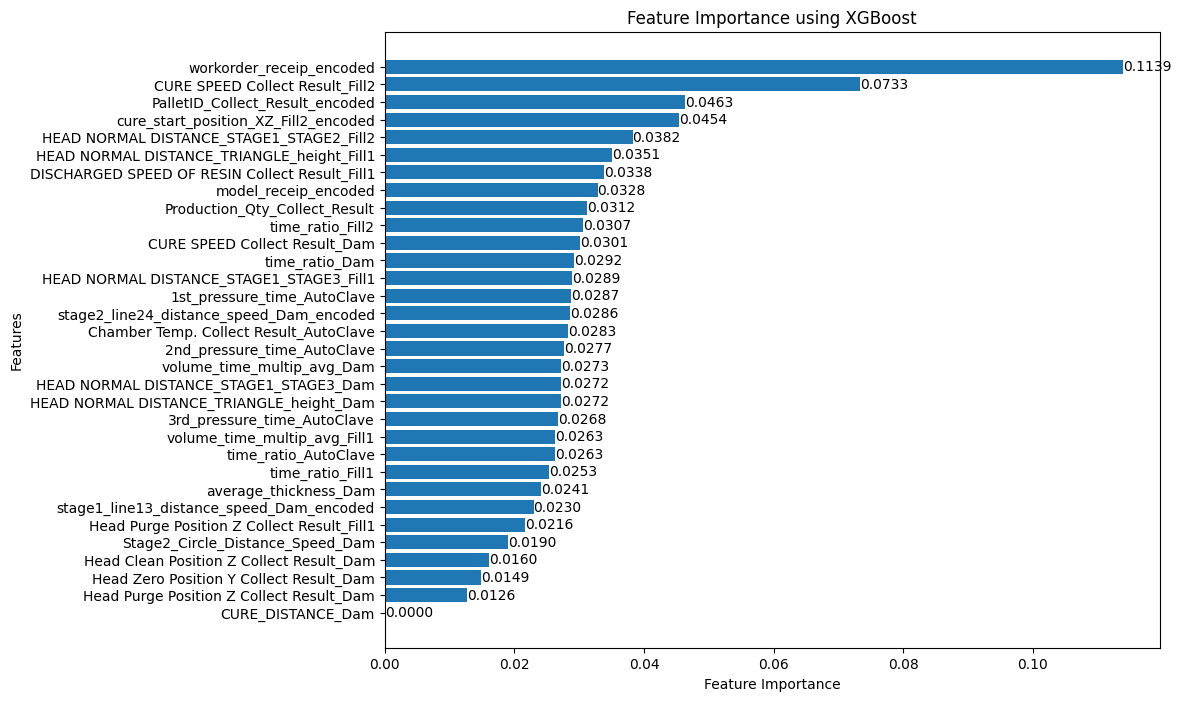

In [201]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

# 특징과 타겟 변수 분리
X = train_data.drop(columns=['target'])
y = train_data['target']

# 타겟 변수 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# XGBoost 모델 학습
model = xgb.XGBClassifier()
model.fit(X, y_encoded)

# 변수 중요도 계산
importance = model.feature_importances_

# 중요도 순으로 정렬
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도가 0.01 이하인 변수 필터링
filtered_features = importance_df[importance_df['Importance'] > 0.01]['Feature']
X_filtered = X[filtered_features]

# 필터링된 데이터로 모델 재학습
model.fit(X_filtered, y_encoded)

# 변수 중요도 다시 계산
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_filtered.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 변수 중요도 시각화
plt.figure(figsize=(10, 8))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance using XGBoost')
plt.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬되도록 y축 반전

# 각 막대 위에 변수 중요도 수치 표시
for bar in bars:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2, 
        f'{bar.get_width():.4f}', 
        va='center'
    )

plt.show()